This notebook is based on the notebook format from the youtube series by Jonathan Soma "Introduction to geopandas"

The data within this notebook is from the City of Torontos Open Data set.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon

#see all columns when calling head on a dataframe
pd.set_option('display.max_columns', None)

from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#Tell matplot lib to generate plots inline, within the notebook
%matplotlib inline

<Axes: >

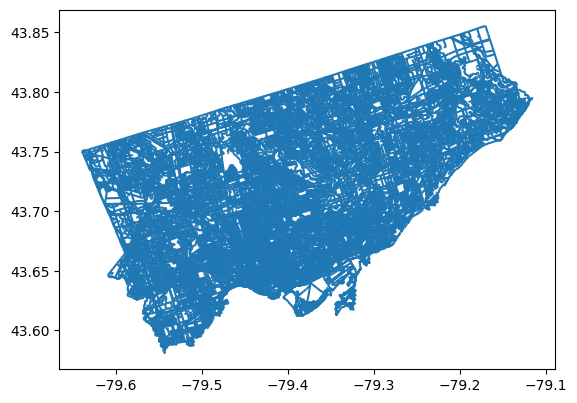

In [2]:
shape_path = "/workspace/GIS_project/data/Centreline - Version 2 - 4326/Centreline - Version 2 - 4326.shp"
centreline = gpd.read_file(shape_path)
centreline.plot()

In [3]:
centreline.head()

,_id1,CENTREL2,LINEAR_3,LINEAR_4,LINEAR_5,ADDRESS6,ADDRESS7,PARITY_8,PARITY_9,LO_NUM_10,HI_NUM_11,LO_NUM_12,HI_NUM_13,BEGIN_A14,END_ADD15,BEGIN_A16,END_ADD17,BEGIN_A18,END_ADD19,BEGIN_A20,END_ADD21,LOW_NUM22,HIGH_NU23,LOW_NUM24,HIGH_NU25,LINEAR_26,LINEAR_27,LINEAR_28,LINEAR_29,LINEAR_30,FROM_IN31,TO_INTE32,ONEWAY_33,ONEWAY_34,FEATURE35,FEATURE36,JURISDI37,CENTREL38,OBJECTI39,MI_PRIN40,geometry
0,1,914600,2141,Morrison St,Morrison Street,None,None,N,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Morrison,St,None,ET,Morrison St,13470555,13470560,0,Not One-Way,201500,Local,CITY OF TORONTO,None,1,1,"LINESTRING (-79.50875 43.59744, -79.50987 43.5..."
1,2,914601,2666,Twelfth St,Twelfth Street,66-92,65-89,E,O,66,92,65,89,1040061,1040085,1040060,1040082,66,92,65,89,65,89,66,92,Twelfth,St,None,None,Twelfth St,13470560,13470530,0,Not One-Way,201500,Local,CITY OF TORONTO,None,2,2,"LINESTRING (-79.50987 43.5972, -79.51035 43.59..."
2,3,7862398,2611,Thirteenth St,Thirteenth Street,66-96,65-91,E,O,66,96,65,91,7862400,7862422,7862399,7862415,66,96,65,91,65,91,66,96,Thirteenth,St,None,None,Thirteenth St,13470571,13470538,0,Not One-Way,201500,Local,CITY OF TORONTO,None,3,3,"LINESTRING (-79.51087 43.59697, -79.51134 43.5..."
3,4,914587,1962,Lake Shore Blvd W,Lake Shore Boulevard West,None,3180-3180,N,E,0,0,3180,3180,0,0,1013460,1013460,0,0,3180,3180,0,0,3180,3180,Lake Shore,Blvd,W,None,Lake Shore Blvd W,13470546,13470552,0,Not One-Way,201200,Major Arterial,CITY OF TORONTO,None,6,6,"LINESTRING (-79.51805 43.59795, -79.51914 43.5..."
4,5,6735911,1962,Lake Shore Blvd W,Lake Shore Boulevard West,3197-3197,3190-3190,O,E,3197,3197,3190,3190,6735910,6735910,6735913,6735913,3197,3197,3190,3190,3197,3197,3190,3190,Lake Shore,Blvd,W,None,Lake Shore Blvd W,13470552,13470558,0,Not One-Way,201200,Major Arterial,CITY OF TORONTO,None,7,7,"LINESTRING (-79.51914 43.5977, -79.52024 43.59..."


In [4]:
#We only want non motorway roads. So find feature types, and select the ones we want
centreline.FEATURE36.unique()


array(['Local', 'Major Arterial', 'River', 'Geostatistical line',
       'Major Shoreline', 'Collector', 'Minor Arterial', 'Major Railway',
       'Expressway', 'Laneway', 'Expressway Ramp', 'Pending',
       'Major Arterial Ramp', 'Other', 'Hydro Line', 'Walkway',
       'Minor Shoreline (Land locked)', 'Minor Railway', 'Trail',
       'Creek/Tributary', 'Collector Ramp', 'Busway', 'Ferry Route',
       'Access Road', 'Other Ramp', 'Minor Arterial Ramp'], dtype=object)

In [5]:
road_list = ['Local', 'Major Arterial', 'Major Arterial Ramp', 'Collector', 'Collector Ramp', 'Minor Arterial', 'Minor Arterial Ramp']
roads = centreline.query('FEATURE36 in @road_list')
roads = roads[['CENTREL2', 'LINEAR_3', 'LINEAR_4','LINEAR_5',
                'LINEAR_26', 'LINEAR_30', 'FROM_IN31', 'TO_INTE32', 'FEATURE35',
                'FEATURE36', 'JURISDI37', 'OBJECTI39', 'MI_PRIN40', 'geometry']]
roads.head()

,CENTREL2,LINEAR_3,LINEAR_4,LINEAR_5,LINEAR_26,LINEAR_30,FROM_IN31,TO_INTE32,FEATURE35,FEATURE36,JURISDI37,OBJECTI39,MI_PRIN40,geometry
0,914600,2141,Morrison St,Morrison Street,Morrison,Morrison St,13470555,13470560,201500,Local,CITY OF TORONTO,1,1,"LINESTRING (-79.50875 43.59744, -79.50987 43.5..."
1,914601,2666,Twelfth St,Twelfth Street,Twelfth,Twelfth St,13470560,13470530,201500,Local,CITY OF TORONTO,2,2,"LINESTRING (-79.50987 43.5972, -79.51035 43.59..."
2,7862398,2611,Thirteenth St,Thirteenth Street,Thirteenth,Thirteenth St,13470571,13470538,201500,Local,CITY OF TORONTO,3,3,"LINESTRING (-79.51087 43.59697, -79.51134 43.5..."
3,914587,1962,Lake Shore Blvd W,Lake Shore Boulevard West,Lake Shore,Lake Shore Blvd W,13470546,13470552,201200,Major Arterial,CITY OF TORONTO,6,6,"LINESTRING (-79.51805 43.59795, -79.51914 43.5..."
4,6735911,1962,Lake Shore Blvd W,Lake Shore Boulevard West,Lake Shore,Lake Shore Blvd W,13470552,13470558,201200,Major Arterial,CITY OF TORONTO,7,7,"LINESTRING (-79.51914 43.5977, -79.52024 43.59..."


<Axes: >

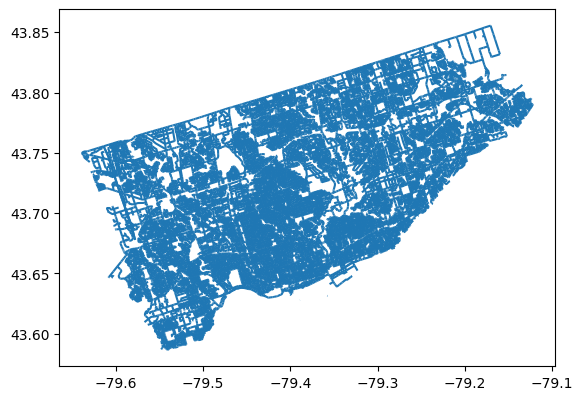

In [6]:
roads.plot()

In [7]:
#read shapefiles
file_path_1 = "/workspace/GIS_project/data/traffic/raw-data-2010-2019.csv"
file_path_2 = "/workspace/GIS_project/data/traffic/raw-data-2020-2029.csv"
#combine the csvs into a single dataframe
traffic = pd.concat(
    map(pd.read_csv, [file_path_1, file_path_2]), ignore_index=True)
#display head data
traffic.head()

,_id,count_id,count_date,location_id,location,lng,lat,centreline_type,centreline_id,px,time_start,time_end,sb_cars_r,sb_cars_t,sb_cars_l,nb_cars_r,nb_cars_t,nb_cars_l,wb_cars_r,wb_cars_t,wb_cars_l,eb_cars_r,eb_cars_t,eb_cars_l,sb_truck_r,sb_truck_t,sb_truck_l,nb_truck_r,nb_truck_t,nb_truck_l,wb_truck_r,wb_truck_t,wb_truck_l,eb_truck_r,eb_truck_t,eb_truck_l,sb_bus_r,sb_bus_t,sb_bus_l,nb_bus_r,nb_bus_t,nb_bus_l,wb_bus_r,wb_bus_t,wb_bus_l,eb_bus_r,eb_bus_t,eb_bus_l,nx_peds,sx_peds,ex_peds,wx_peds,nx_bike,sx_bike,ex_bike,wx_bike,nx_other,sx_other,ex_other,wx_other
0,1,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12T07:30:00,2010-01-12T07:45:00,8.0,0.0,1.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,31.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12T07:45:00,2010-01-12T08:00:00,8.0,0.0,4.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12T08:00:00,2010-01-12T08:15:00,4.0,0.0,5.0,0.0,0.0,0.0,0.0,58.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12T08:15:00,2010-01-12T08:30:00,12.0,0.0,3.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,37.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12T08:30:00,2010-01-12T08:45:00,11.0,0.0,2.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,30.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [8]:
#calculate new field that adds up all motor traffic
traffic['motortraf'] = traffic.loc[:,'sb_cars_r':'eb_bus_l'].sum(axis=1) + traffic.loc[:,'nx_other':'wx_other'].sum(axis=1)
#create a year field
traffic['year'] = pd.to_datetime(traffic['count_date']).dt.year

#new, cleaner, dataframe
traffic_trunc = traffic[['count_id', 'year', 'location_id', 'location', 'lng', 'lat', 'centreline_type', 'centreline_id', 'motortraf']]
traffic_trunc.head()

,count_id,year,location_id,location,lng,lat,centreline_type,centreline_id,motortraf
0,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,94.0
1,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,128.0
2,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,113.0
3,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,142.0
4,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,140.0


In [9]:
#aggregate and group by year and location id
traffic_agg = traffic_trunc.groupby(['year','location_id']).agg({'count_id': pd.Series.mode,
                                                              'location': pd.Series.mode,
                                                              'lng': pd.Series.mode, 'lat': pd.Series.mode,
                                                              'centreline_type':pd.Series.mode,
                                                              'centreline_id':pd.Series.mode,
                                                              'motortraf': 'sum'})
traffic_agg.head()

count_id                                      location  \
year location_id                                                          
2010 3938           26267  DON VALLEY PKWY AT WYNFORD DR WTCS (PX 1037)   
     3940           25879    BLACK CREEK DR AT LAWRENCE AVE W (PX 1348)   
     3946           25409                 BIRCHCLIFF AVE AT KINGSTON RD   
     3948           26099                    KINGSTON RD AT MIDLAND AVE   
     3949           26317                       CHINE DR AT KINGSTON RD   

                        lng        lat centreline_type centreline_id  \
year location_id                                                       
2010 3938        -79.330889  43.726667             2.0    13453914.0   
     3940        -79.494096  43.704950             2.0    13457600.0   
     3946        -79.264752  43.691480             2.0    13459344.0   
     3948        -79.248187  43.711121             2.0    13456025.0   
     3949        -79.245073  43.714114             2.0    13455525.0   

                  motortraf  
year location_id             
2010 3938           11935.0  
     3940           42904.0  
     3946           12563.0  
     3948           21013.0  
     3949           17421.0

In [10]:
#reset index so that we can use the data frame
traffic_agg = traffic_agg.reset_index()
traffic_agg = traffic_agg.query('year >= 2014')
traffic_agg.head(-5)

,year,location_id,count_id,location,lng,lat,centreline_type,centreline_id,motortraf
2474,2014,3926,31313,BLOOR ST AT SOUTH KINGSWAY & RIVERVIEW GARDENS...,-79.485752,43.648312,2.0,13467247.0,19084.0
2475,2014,3935,31537,AVENUE RD AT LONSDALE RD (PX 113),-79.403017,43.690782,2.0,13459836.0,21857.0
2476,2014,3936,31667,LAKE SHORE BLVD AT LEGION RD (PX 1994),-79.483267,43.620511,2.0,13469793.0,9027.0
2477,2014,3943,"[31121, 31229, 31249]",OCONNOR DR AT ST CLAIR AVE (PX 447),-79.312836,43.705396,2.0,13457092.0,67380.0
2478,2014,3952,"[31541, 31817]",KINGSTON RD AT SCARBOROUGH GOLF CLUB RD (PX 1053),-79.209349,43.746002,2.0,13450532.0,53767.0
...,...,...,...,...,...,...,...,...,...
10062,2024,51160,101526,Allenvale Ave / Lauder Ave,-79.445359,43.692544,2.0,13459620.0,656.0
10063,2024,51161,101529,Oakwood Ave / Earlsdale Ave,-79.438091,43.685555,2.0,13460884.0,9187.0
10064,2024,51231,101538,Brunswick Ave / Lowther Ave,-79.408303,43.668037,2.0,13463884.0,910.0
10065,2024,51232,101541,Royal York Rd / Valiant Rd,-79.515116,43.655848,2.0,13466089.0,10564.0


/workspace/GIS_project/venv/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

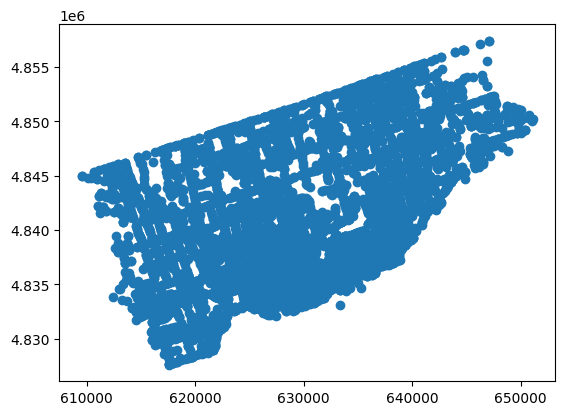

In [11]:
points = traffic_agg.apply(lambda row: Point(row.lng, row.lat), axis = 1)
#only keep traffic 2014 and after to line up with collisions
traffic_intersections = gpd.GeoDataFrame(traffic_agg, geometry=points)
#using metadate (filename) to initialize the data with the proper projection
traffic_intersections.crs = {'init': 'epsg:4326'}
traffic_26917 = traffic_intersections.to_crs(epsg=26917)
traffic_26917.plot()

In [12]:
traffic_26917.head(-5)

,year,location_id,count_id,location,lng,lat,centreline_type,centreline_id,motortraf,geometry
2474,2014,3926,31313,BLOOR ST AT SOUTH KINGSWAY & RIVERVIEW GARDENS...,-79.485752,43.648312,2.0,13467247.0,19084.0,POINT (622118.995 4833926.806)
2475,2014,3935,31537,AVENUE RD AT LONSDALE RD (PX 113),-79.403017,43.690782,2.0,13459836.0,21857.0,POINT (628700.572 4838768.742)
2476,2014,3936,31667,LAKE SHORE BLVD AT LEGION RD (PX 1994),-79.483267,43.620511,2.0,13469793.0,9027.0,POINT (622375.821 4830842.815)
2477,2014,3943,"[31121, 31229, 31249]",OCONNOR DR AT ST CLAIR AVE (PX 447),-79.312836,43.705396,2.0,13457092.0,67380.0,POINT (635935.311 4840535.754)
2478,2014,3952,"[31541, 31817]",KINGSTON RD AT SCARBOROUGH GOLF CLUB RD (PX 1053),-79.209349,43.746002,2.0,13450532.0,53767.0,POINT (644175.957 4845220.562)
...,...,...,...,...,...,...,...,...,...,...
10062,2024,51160,101526,Allenvale Ave / Lauder Ave,-79.445359,43.692544,2.0,13459620.0,656.0,POINT (625284.528 4838899.594)
10063,2024,51161,101529,Oakwood Ave / Earlsdale Ave,-79.438091,43.685555,2.0,13460884.0,9187.0,POINT (625884.899 4838134.35)
10064,2024,51231,101538,Brunswick Ave / Lowther Ave,-79.408303,43.668037,2.0,13463884.0,910.0,POINT (628323.027 4836234.361)
10065,2024,51232,101541,Royal York Rd / Valiant Rd,-79.515116,43.655848,2.0,13466089.0,10564.0,POINT (619735.856 4834720.955)


In [13]:
collision = gpd.read_file('/workspace/GIS_project/data/Traffic Collisions - 4326/Traffic Collisions - 4326.shp')
collision.head(-5)

,_id1,OCC_DAT2,OCC_MON3,OCC_DOW4,OCC_YEA5,OCC_HOU6,DIVISIO7,FATALIT8,INJURY_9,FTR_COL10,PD_COLL11,HOOD_1512,NEIGHBO13,LONG_WG14,LAT_WGS15,AUTOMOB16,MOTORCY17,PASSENG18,BICYCLE19,PEDESTR20,geometry
0,1,1388552400000,January,Wednesday,2014,4,D43,0,YES,NO,NO,157,Bendale South (157),-79.25535525232044,43.75352197370893,YES,NO,YES,NO,NO,MULTIPOINT (-79.25536 43.75352)
1,2,1388552400000,January,Wednesday,2014,14,D14,0,NO,YES,NO,078,Kensington-Chinatown (78),-79.40601573209595,43.652310093633126,YES,NO,NO,NO,NO,MULTIPOINT (-79.40602 43.65231)
2,14,1388552400000,January,Wednesday,2014,1,D14,0,NO,NO,YES,086,Roncesvalles (86),-79.4286372237863,43.64220588807775,YES,NO,NO,NO,NO,MULTIPOINT (-79.42864 43.64221)
3,15,1388552400000,January,Wednesday,2014,14,D13,0,NO,NO,YES,101,Forest Hill South (101),-79.4178019320394,43.68673751185377,YES,NO,NO,NO,NO,MULTIPOINT (-79.4178 43.68674)
4,16,1388552400000,January,Wednesday,2014,2,D23,0,NO,NO,YES,007,Willowridge-Martingrove-Richview (7),-79.56313850270357,43.67441063320029,YES,NO,NO,NO,NO,MULTIPOINT (-79.56314 43.67441)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574219,687130,1719723600000,June,Sunday,2024,17,D33,0,NO,YES,NO,047,Don Valley Village (47),-79.34698765381663,43.775179913411826,YES,NO,NO,NO,NO,MULTIPOINT (-79.34699 43.77518)
574220,687131,1719723600000,June,Sunday,2024,19,D14,0,NO,NO,YES,080,Palmerston-Little Italy (80),-79.41706672764312,43.65516659990851,YES,NO,NO,YES,NO,MULTIPOINT (-79.41707 43.65517)
574221,687132,1719723600000,June,Sunday,2024,15,D51,0,NO,YES,NO,168,Downtown Yonge East (168),-79.3777897470096,43.65194899105262,YES,NO,NO,NO,NO,MULTIPOINT (-79.37779 43.65195)
574222,687133,1719723600000,June,Sunday,2024,18,D55,0,NO,NO,YES,066,Danforth (66),-79.32363123294031,43.68336521316597,YES,NO,NO,NO,NO,MULTIPOINT (-79.32363 43.68337)


In [14]:
#create new field that we can sum up for total crashes in a year
collision['motorcol'] = collision.apply(lambda x: 1 if x['AUTOMOB16'] == 'YES' else 0, axis=1)
#change the number of fatalities into whether a fatal crash happened or not
collision['fatals'] = collision.apply(lambda x: 1 if x['FATALIT8'] > 0 else 0, axis=1)
#binary field for whether the crash had injuries, so we can sum up total amount of collisions with injuries
collision['injuries'] = collision.apply(lambda x: 1 if x['INJURY_9'] == 'YES' else 0, axis=1)
#aggregate and group by year and geometry

In [15]:
collision_agg = collision.groupby(['OCC_YEA5','geometry']).agg({'_id1': 'max',
                                                            'HOOD_1512': pd.Series.mode,
                                                            'NEIGHBO13': pd.Series.mode,
                                                            'LONG_WG14': pd.Series.mode, 'LAT_WGS15': pd.Series.mode,
                                                            'motorcol':'sum',
                                                            'fatals':'sum',
                                                            'injuries': 'sum'})
collision_agg = collision_agg.reset_index()
collision_agg = collision_agg.rename(columns={'OCC_YEA5':'year'})
collision_agg = collision_agg.drop(columns=['geometry'])
collision_agg.head(-5)

,year,_id1,HOOD_1512,NEIGHBO13,LONG_WG14,LAT_WGS15,motorcol,fatals,injuries
0,2014,60064,011,Eringate-Centennial-West Deane (11),-79.60450679069385,43.64709057849199,4,0,0
1,2014,59852,011,Eringate-Centennial-West Deane (11),-79.60308289706491,43.65156185991029,6,0,1
2,2014,41959,011,Eringate-Centennial-West Deane (11),-79.59004840351771,43.64550849335001,4,0,0
3,2014,61195,011,Eringate-Centennial-West Deane (11),-79.58120449946392,43.65094585006111,5,0,0
4,2014,64462,013,Etobicoke West Mall (13),-79.57948999636169,43.651403743664964,12,0,3
...,...,...,...,...,...,...,...,...,...
102844,2024,684870,166,St Lawrence-East Bayfront-The Islands (166),-79.3791981444218,43.64252328162694,4,0,0
102845,2024,685827,166,St Lawrence-East Bayfront-The Islands (166),-79.37682824600172,43.64114868007887,16,0,1
102846,2024,686995,166,St Lawrence-East Bayfront-The Islands (166),-79.37468264743217,43.64195188105551,15,0,0
102847,2024,686910,166,St Lawrence-East Bayfront-The Islands (166),-79.37302184853932,43.64252058162425,4,0,0


<Axes: >

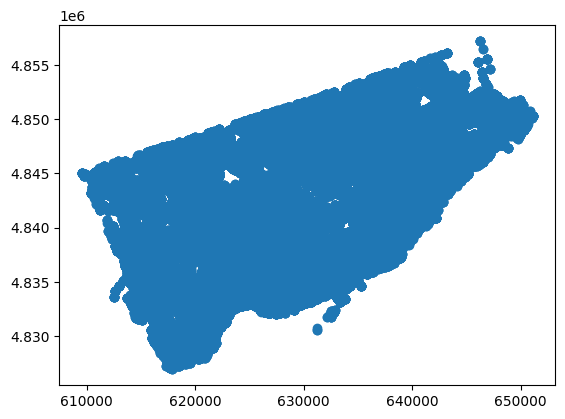

In [16]:
#plot our new data
collision_agg = gpd.GeoDataFrame(collision_agg, geometry=gpd.points_from_xy(collision_agg.LONG_WG14, collision_agg.LAT_WGS15), crs='EPSG:4326')
#using metadate (filename) to initialize the data with the proper projection
collision_26917 = collision_agg.to_crs(epsg=26917)
collision_26917.plot()

We have the three layers that we need: roads, traffic, and collisions.

We need to join collisions to roads. Since collisions are offset to the nearest intersection there will be multiple roads
sharing the same intersection counts. 

Since we do not know which direction a car was coming from for collisions we will assume that any intersection connected
to a road contributes to its overall traffic and collisions.

This can be problamatic in cases where a minor road is attached to a major road, and the majority of collision
at an intersection are caused by the major road.


First we attactch collision counts to traffic counts


In [17]:
#alternative implementation
#col_split = {k:d for k, d in collision_26917.groupby('year')}
#traf_split = {k:d for k, d in traffic_26917.groupby('year')}

#col_traf = pd.DataFrame()
#for i in traf_split:
#    col_traf = pd.concat([col_traf, gpd.sjoin_nearest(traf_split[i], col_split[i], max_distance=5, how='left')])

#col_traf.head(-5)

In [18]:
#traffic_26917
#collision_26917

#split the dataframe that is not the base. In this case collisions, since we want all traffic
#but only the collisions were traffic is monitored
split = {k:d for k, d in collision_26917.groupby('year')}

traffic_collision = traffic_26917.groupby('year').apply(lambda x: gpd.sjoin_nearest(x, split[x.iloc[0]['year']], max_distance=10, how='left'))
traffic_collision = traffic_collision.reset_index()
traffic_collision = traffic_collision.drop(columns=['index_right'])
traffic_collision.head(-5)

/tmp/ipykernel_652/511620777.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  traffic_collision = traffic_26917.groupby('year').apply(lambda x: gpd.sjoin_nearest(x, split[x.iloc[0]['year']], max_distance=10, how='left'))


,year,level_1,year_left,location_id,count_id,location,lng,lat,centreline_type,centreline_id,motortraf,geometry,year_right,_id1,HOOD_1512,NEIGHBO13,LONG_WG14,LAT_WGS15,motorcol,fatals,injuries
0,2014,2474,2014,3926,31313,BLOOR ST AT SOUTH KINGSWAY & RIVERVIEW GARDENS...,-79.485752,43.648312,2.0,13467247.0,19084.0,POINT (622118.995 4833926.806),2014.0,62964.0,087,High Park-Swansea (87),-79.48576801302461,43.64833124118453,14.0,0.0,3.0
1,2014,2475,2014,3935,31537,AVENUE RD AT LONSDALE RD (PX 113),-79.403017,43.690782,2.0,13459836.0,21857.0,POINT (628700.572 4838768.742),2014.0,63753.0,101,Forest Hill South (101),-79.40290845104441,43.690787230450496,11.0,0.0,0.0
2,2014,2476,2014,3936,31667,LAKE SHORE BLVD AT LEGION RD (PX 1994),-79.483267,43.620511,2.0,13469793.0,9027.0,POINT (622375.821 4830842.815),2014.0,59112.0,161,Humber Bay Shores (161),-79.48325661690977,43.620507777380844,9.0,0.0,2.0
3,2014,2477,2014,3943,"[31121, 31229, 31249]",OCONNOR DR AT ST CLAIR AVE (PX 447),-79.312836,43.705396,2.0,13457092.0,67380.0,POINT (635935.311 4840535.754),2014.0,64475.0,054,O'Connor-Parkview (54),-79.31282764830006,43.70539159071835,29.0,0.0,5.0
4,2014,2478,2014,3952,"[31541, 31817]",KINGSTON RD AT SCARBOROUGH GOLF CLUB RD (PX 1053),-79.209349,43.746002,2.0,13450532.0,53767.0,POINT (644175.957 4845220.562),2014.0,63766.0,140,Guildwood (140),-79.20931339145011,43.74593588997494,15.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7588,2024,10062,2024,51160,101526,Allenvale Ave / Lauder Ave,-79.445359,43.692544,2.0,13459620.0,656.0,POINT (625284.528 4838899.594),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7589,2024,10063,2024,51161,101529,Oakwood Ave / Earlsdale Ave,-79.438091,43.685555,2.0,13460884.0,9187.0,POINT (625884.899 4838134.35),2024.0,683754.0,107,Oakwood Village (107),-79.43806631113908,43.685549492736094,6.0,0.0,2.0
7590,2024,10064,2024,51231,101538,Brunswick Ave / Lowther Ave,-79.408303,43.668037,2.0,13463884.0,910.0,POINT (628323.027 4836234.361),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7591,2024,10065,2024,51232,101541,Royal York Rd / Valiant Rd,-79.515116,43.655848,2.0,13466089.0,10564.0,POINT (619735.856 4834720.955),2024.0,665905.0,015,Kingsway South (15),-79.5151016928627,43.6558412704422,1.0,0.0,0.0


<Axes: >

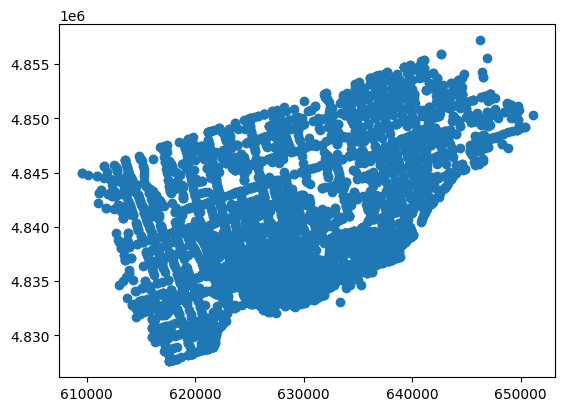

In [19]:
#checking to see we still have data after the merge
traf_col_map = traffic_collision.query('_id1 > 0')
traf_col_map.plot()

<Axes: >

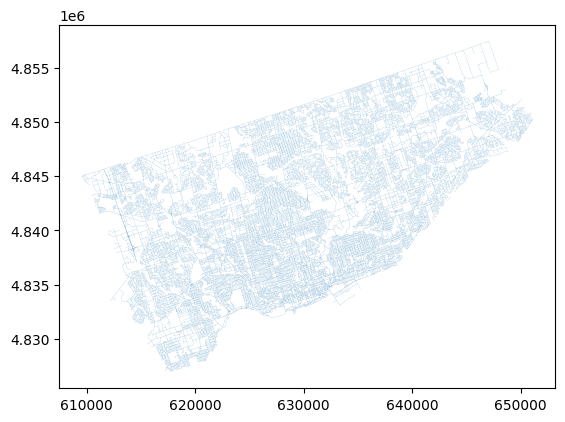

In [26]:
#create buffer around each road
road_26917 = roads.to_crs(epsg=26917)
road_26917_buffer = road_26917
road_26917_buffer['geometry'] = road_26917_buffer['geometry'].buffer(5)
road_26917_buffer.plot()

In [33]:
#use buffer to get all point within the polygon
buffer_with_data = gpd.sjoin(road_26917_buffer, traffic_collision, how='right')
buffer_with_data = buffer_with_data[['CENTREL2', 'year', 'motortraf', 'motorcol','fatals','injuries']]

#aggregate
buffer_agg = buffer_with_data.groupby(['CENTREL2', 'year']).agg('sum')
buffer_agg = buffer_agg.reset_index()
buffer_agg.to_csv('test.csv')

In [34]:
#join back to roads
all_roads = road_26917.join(buffer_agg, on=['CENTREL2'], validate='1:m', rsuffix='_right')
all_roads.head(-5)

,CENTREL2,LINEAR_3,LINEAR_4,LINEAR_5,LINEAR_26,LINEAR_30,FROM_IN31,TO_INTE32,FEATURE35,FEATURE36,JURISDI37,OBJECTI39,MI_PRIN40,geometry,CENTREL2_right,year,motortraf,motorcol,fatals,injuries
0,914600,2141,Morrison St,Morrison Street,Morrison,Morrison St,13470555,13470560,201500,Local,CITY OF TORONTO,1,1,"POLYGON ((620277.174 4828210.441, 620276.699 4...",NaN,NaN,NaN,NaN,NaN,NaN
1,914601,2666,Twelfth St,Twelfth Street,Twelfth,Twelfth St,13470560,13470530,201500,Local,CITY OF TORONTO,2,2,"POLYGON ((620230.306 4828339.006, 620230.177 4...",NaN,NaN,NaN,NaN,NaN,NaN
2,7862398,2611,Thirteenth St,Thirteenth Street,Thirteenth,Thirteenth St,13470571,13470538,201500,Local,CITY OF TORONTO,3,3,"POLYGON ((620150.489 4828311.727, 620150.362 4...",NaN,NaN,NaN,NaN,NaN,NaN
3,914587,1962,Lake Shore Blvd W,Lake Shore Boulevard West,Lake Shore,Lake Shore Blvd W,13470546,13470552,201200,Major Arterial,CITY OF TORONTO,6,6,"POLYGON ((619527.788 4828252.379, 619527.315 4...",NaN,NaN,NaN,NaN,NaN,NaN
4,6735911,1962,Lake Shore Blvd W,Lake Shore Boulevard West,Lake Shore,Lake Shore Blvd W,13470552,13470558,201200,Major Arterial,CITY OF TORONTO,7,7,"POLYGON ((619439.831 4828222.367, 619439.359 4...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66734,60005255,11636,Mathersfield Dr,Mathersfield Drive,Mathersfield,Mathersfield Dr,60005256,14672478,201500,Local,CITY OF TORONTO,259718,259718,"POLYGON ((630082.566 4837939.513, 630082.082 4...",NaN,NaN,NaN,NaN,NaN,NaN
66735,60005254,11636,Mathersfield Dr,Mathersfield Drive,Mathersfield,Mathersfield Dr,13973630,60005256,201500,Local,CITY OF TORONTO,259719,259719,"POLYGON ((630090.759 4837941.501, 630090.641 4...",NaN,NaN,NaN,NaN,NaN,NaN
66743,30036500,339,St Clair Ave E,St Clair Avenue East,St Clair,St Clair Ave E,13460123,30036499,201200,Major Arterial,CITY OF TORONTO,259754,259754,"POLYGON ((629819.432 4838611.7, 629819.91 4838...",NaN,NaN,NaN,NaN,NaN,NaN
66744,30036501,339,St Clair Ave E,St Clair Avenue East,St Clair,St Clair Ave E,30036499,13460072,201200,Major Arterial,CITY OF TORONTO,259755,259755,"POLYGON ((629854.184 4838622.656, 629854.659 4...",NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
test = all_roads.query('CENTREL2_right > 0 & CENTREL2 == CENTREL2_right')
test.to_csv('test.csv')